## Analysis of ICE Detentions During President Trump's First & Current Term ##

##### This notebook runs the first of two analyses on data obtained by The Deportation Data Project. This notebook, labeled part_A, focuses on detentions in 2025. Note: the latest available dataset stops at mid-October 2025. 

##### Together, part_A and part_B (the second notebook and analysis) were used to compare the number of ICE detentions in 2016 (Trump's first term) and 2025 (Trump's second term). 

In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In this section, we open the relevant Excel sheet that contains ICE detention stays from September 2023 to mid-October 2025 and store it into a dataframe called "ICE_stays." This Excel sheet was processed by The Deportation Data Project, it is not raw. 

We then convert a column containing book-ins called "stay_book_in_date_time" into a string. We also gather more information on the dataset uploaded by DDP, including:
- A display of the dataset's first five rows.
- The kinds of data for each column.
- The number of rows in the uploaded dataset.

In [2]:
ICE_stays = pd.read_excel("../data/detention-stays.xlsx") 
ICE_stays["stay_book_in_date_time"] = ICE_stays["stay_book_in_date_time"].astype ("str")
ICE_stays.head()

,stay_ID,n_stints,detention_facility_codes_all,stay_book_in_date_time,stay_book_out_date_time,detention_release_reason,stay_book_out_date,stay_release_reason,religion,gender,...,book_in_date_time_first,book_out_date_time_first,detention_facility_longest,detention_facility_code_longest,book_in_date_time_longest,book_out_date_time_longest,detention_facility_last,detention_facility_code_last,book_in_date_time_last,book_out_date_time_last
0,000033bd6a1712721982e3cc31fa5efe203aa033_2025-...,3,KRO; WCCPBFL; JENATLA,2025-05-19 22:35:00,2025-06-02 07:02:00,Removed,2025-06-02,Removed,NaN,Male,...,2025-05-19 22:35:00,2025-05-20 19:30:00,BROWARD TRANSITIONAL CENTER,WCCPBFL,2025-05-20 21:23:00,2025-05-31 06:30:00,ALEXANDRIA STAGING FACILITY,JENATLA,2025-06-01 00:05:00,2025-06-02 07:02:00
1,00007cb10d7edd5e97cbefad22016c1679d98343_2023-...,2,ALAMCNC; STWRTGA,2023-09-23 12:00:00,2023-11-27 14:56:00,Removed,2023-11-27,Removed,NaN,Male,...,2023-09-23 12:00:00,2023-09-25 06:24:00,STEWART DETENTION CENTER,STWRTGA,2023-09-25 14:35:00,2023-11-27 14:56:00,STEWART DETENTION CENTER,STWRTGA,2023-09-25 14:35:00,2023-11-27 14:56:00
2,000086ed0144f7adc8cf34591b321db280497912_2024-...,2,MTGPCTX; PINEPLA,2024-02-10 11:08:00,2024-04-05 11:02:00,Removed,2024-04-05,Removed,NaN,Male,...,2024-02-10 11:08:00,2024-03-29 12:00:00,MONTGOMERY PROCESSING CTR,MTGPCTX,2024-02-10 11:08:00,2024-03-29 12:00:00,PINE PRAIRIE ICE PROCESSING CENTER,PINEPLA,2024-03-29 13:54:00,2024-04-05 11:02:00
3,00008df187d556536d9799c5a3e889cbca52ae48_2023-...,4,SFRHOLD; GLDSACA; BKLHOLD; STCDFTX,2023-11-09 11:31:00,2023-12-18 16:46:00,Removed,2023-12-18,Removed,NaN,Male,...,2023-11-09 11:31:00,2023-11-09 14:24:00,GOLDEN STATE ANNEX,GLDSACA,2023-11-09 22:00:00,2023-12-05 05:30:00,SOUTH TEXAS ICE PROCESSING CENTER,STCDFTX,2023-12-06 20:49:00,2023-12-18 16:46:00
4,00008df187d556536d9799c5a3e889cbca52ae48_2025-...,3,SFRHOLD; GLDSACA; EROFCB,2025-09-11 11:10:00,2025-09-16 04:30:00,Removed,2025-09-16,Removed,NaN,Male,...,2025-09-11 11:10:00,2025-09-11 16:00:00,ERO EL PASO CAMP EAST MONTANA,EROFCB,2025-09-13 15:00:00,2025-09-16 04:30:00,ERO EL PASO CAMP EAST MONTANA,EROFCB,2025-09-13 15:00:00,2025-09-16 04:30:00


In [3]:
ICE_stays.dtypes

stay_ID                                    object
n_stints                                    int64
detention_facility_codes_all               object
stay_book_in_date_time                     object
stay_book_out_date_time            datetime64[ns]
detention_release_reason                   object
stay_book_out_date                 datetime64[ns]
stay_release_reason                        object
religion                                   object
gender                                     object
marital_status                             object
birth_year                                  int64
ethnicity                                  object
entry_status                               object
felon                                      object
bond_posted_date                   datetime64[ns]
bond_posted_amount                        float64
case_status                                object
case_category                              object
final_order_yes_no                         object


In [4]:
print (len(ICE_stays))

671750


By making the "stay_book_in_date_time" column a string instead of a date, it allowed us to create a new column called "year." This would later be used to create a subset that will only contain detention book-ins from 2025. 

In [5]:
ICE_stays["year"] = ICE_stays["stay_book_in_date_time"].apply(lambda x: str(x).split("-")[0])
ICE_stays["year"]

0         2025
1         2023
2         2024
3         2023
4         2025
          ... 
671745    2025
671746    2024
671747    2025
671748    2023
671749    2025
Name: year, Length: 671750, dtype: object

After adding the "year" column to our "ICE_stays" dataframe, we will now be reconverting the "stay_book_in_date_time" column from a string into a date. This will allow us to:

- Create a new dataframe called "stays_over_time" that will have it's index reset to book-in dates (otherwise known as "stay_book_in_date_time").

This step will allow us to resample by month later in the analysis for charting purposes. 

In [6]:
ICE_stays["stay_book_in_date_time"] = ICE_stays["stay_book_in_date_time"].astype ("datetime64[ns]")
ICE_stays.dtypes

stay_ID                                    object
n_stints                                    int64
detention_facility_codes_all               object
stay_book_in_date_time             datetime64[ns]
stay_book_out_date_time            datetime64[ns]
detention_release_reason                   object
stay_book_out_date                 datetime64[ns]
stay_release_reason                        object
religion                                   object
gender                                     object
marital_status                             object
birth_year                                  int64
ethnicity                                  object
entry_status                               object
felon                                      object
bond_posted_date                   datetime64[ns]
bond_posted_amount                        float64
case_status                                object
case_category                              object
final_order_yes_no                         object


In [7]:
stays_over_time = ICE_stays.set_index ("stay_book_in_date_time")
stays_over_time.head()

,stay_ID,n_stints,detention_facility_codes_all,stay_book_out_date_time,detention_release_reason,stay_book_out_date,stay_release_reason,religion,gender,marital_status,...,book_out_date_time_first,detention_facility_longest,detention_facility_code_longest,book_in_date_time_longest,book_out_date_time_longest,detention_facility_last,detention_facility_code_last,book_in_date_time_last,book_out_date_time_last,year
stay_book_in_date_time,,,,,,,,,,,,,,,,,,,,,
2025-05-19 22:35:00,000033bd6a1712721982e3cc31fa5efe203aa033_2025-...,3,KRO; WCCPBFL; JENATLA,2025-06-02 07:02:00,Removed,2025-06-02,Removed,NaN,Male,NaN,...,2025-05-20 19:30:00,BROWARD TRANSITIONAL CENTER,WCCPBFL,2025-05-20 21:23:00,2025-05-31 06:30:00,ALEXANDRIA STAGING FACILITY,JENATLA,2025-06-01 00:05:00,2025-06-02 07:02:00,2025
2023-09-23 12:00:00,00007cb10d7edd5e97cbefad22016c1679d98343_2023-...,2,ALAMCNC; STWRTGA,2023-11-27 14:56:00,Removed,2023-11-27,Removed,NaN,Male,Married,...,2023-09-25 06:24:00,STEWART DETENTION CENTER,STWRTGA,2023-09-25 14:35:00,2023-11-27 14:56:00,STEWART DETENTION CENTER,STWRTGA,2023-09-25 14:35:00,2023-11-27 14:56:00,2023
2024-02-10 11:08:00,000086ed0144f7adc8cf34591b321db280497912_2024-...,2,MTGPCTX; PINEPLA,2024-04-05 11:02:00,Removed,2024-04-05,Removed,NaN,Male,NaN,...,2024-03-29 12:00:00,MONTGOMERY PROCESSING CTR,MTGPCTX,2024-02-10 11:08:00,2024-03-29 12:00:00,PINE PRAIRIE ICE PROCESSING CENTER,PINEPLA,2024-03-29 13:54:00,2024-04-05 11:02:00,2024
2023-11-09 11:31:00,00008df187d556536d9799c5a3e889cbca52ae48_2023-...,4,SFRHOLD; GLDSACA; BKLHOLD; STCDFTX,2023-12-18 16:46:00,Removed,2023-12-18,Removed,NaN,Male,Single,...,2023-11-09 14:24:00,GOLDEN STATE ANNEX,GLDSACA,2023-11-09 22:00:00,2023-12-05 05:30:00,SOUTH TEXAS ICE PROCESSING CENTER,STCDFTX,2023-12-06 20:49:00,2023-12-18 16:46:00,2023
2025-09-11 11:10:00,00008df187d556536d9799c5a3e889cbca52ae48_2025-...,3,SFRHOLD; GLDSACA; EROFCB,2025-09-16 04:30:00,Removed,2025-09-16,Removed,NaN,Male,Single,...,2025-09-11 16:00:00,ERO EL PASO CAMP EAST MONTANA,EROFCB,2025-09-13 15:00:00,2025-09-16 04:30:00,ERO EL PASO CAMP EAST MONTANA,EROFCB,2025-09-13 15:00:00,2025-09-16 04:30:00,2025


The lines below create two seperate subsets by considering the "year" column. The two subsets are: 
- A "stays_2025_true" that only has detention stays from 2025.
- A "stays_2025_false" that does not have detention stays from 2025.

Then, the length of each subset was printed to ensure all rows in the dataset were accounted for. 

In [8]:
ICE_stays_2025 = stays_over_time["year"].str.contains("2025")
ICE_stays_2025.head()

stay_book_in_date_time
2025-05-19 22:35:00     True
2023-09-23 12:00:00    False
2024-02-10 11:08:00    False
2023-11-09 11:31:00    False
2025-09-11 11:10:00     True
Name: year, dtype: bool

In [9]:
stays_2025_true = ICE_stays_2025[ICE_stays_2025 == True]
stays_2025_false = ICE_stays_2025[ICE_stays_2025 == False]

In [10]:
print (len(stays_2025_true))
print (len(stays_2025_false))

271354
400396


In the lines below, the number of detention stays in 2025 were tallied by month to:

- Illustrate in a line graph the number of national detention book-ins in 2025.
- Find the mean (average) number of detention book-ins each month in 2025. 

In [11]:
stays_2025_true_tally = stays_2025_true.resample('M').count()
stays_2025_true_tally

/var/folders/t5/r7v_hk_s3fbblknzpgjrfjzr0000gn/T/ipykernel_59013/1921808741.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stays_2025_true_tally = stays_2025_true.resample('M').count()


stay_book_in_date_time
2025-01-31    21715
2025-02-28    21301
2025-03-31    22517
2025-04-30    22553
2025-05-31    28701
2025-06-30    36416
2025-07-31    31512
2025-08-31    31915
2025-09-30    36939
2025-10-31    17785
Freq: ME, Name: year, dtype: int64

In [12]:
stays_2025_true_tally.describe()

count       10.000000
mean     27135.400000
std       6830.238034
min      17785.000000
25%      21915.500000
50%      25627.000000
75%      31814.250000
max      36939.000000
Name: year, dtype: float64

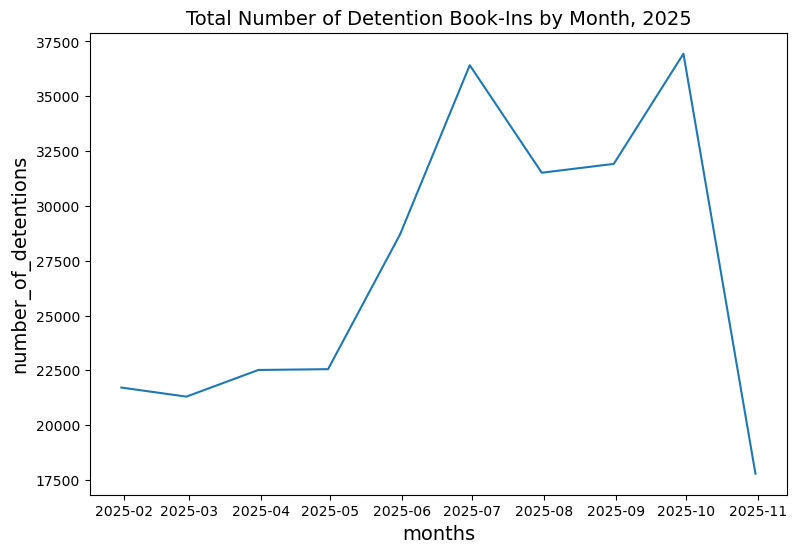

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
ax.plot(stays_2025_true_tally)
ax.set_xlabel("months",fontsize=14)
ax.set_ylabel("number_of_detentions", fontsize=14)
ax.set_title('Total Number of Detention Book-Ins by Month, 2025', fontsize=14)
plt.savefig('../output/detentions_2025_monthly_chart.png')

Here we saved the monthly tallies for 2025 (so far) into a csv in order to use the tallies for our DataWrapper visualization. 

In [14]:
stays_2025_true_tally.to_csv("../output/2025_monthly_tally_table.csv")